## **1 D LINEAR FUNCTION**

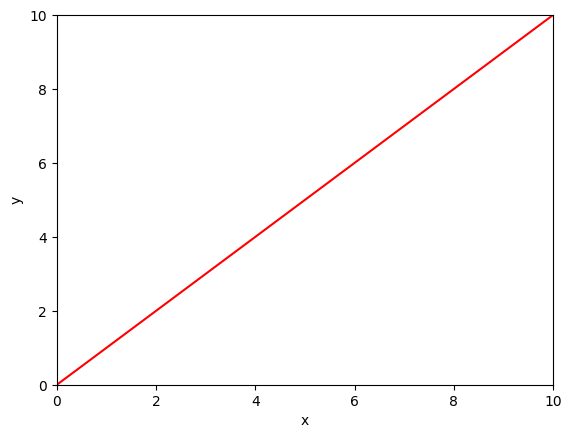

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def linear_function_1D(x,beta,omega):
    y = beta+omega*x
    return y
x = np.arange(0.0,10.0, 0.01)
beta = 0.0; omega = 1.0
y = linear_function_1D(x,beta,omega)
fig, ax = plt.subplots()
ax.plot(x,y,'r-')
ax.set_ylim([0,10]);
ax.set_xlim([0,10])
ax.set_xlabel('x');
ax.set_ylabel('y')
plt.show()

## **2D LINEAR FUNCTION**

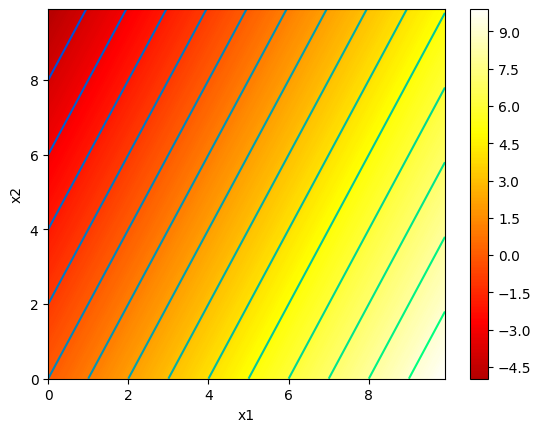

In [ ]:
def draw_2D_function(x1_mesh, x2_mesh, y):
    fig, ax = plt.subplots()
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')
    plt.show()
def linear_function_2D(x1,x2,beta,omega1,omega2):
    y = beta+omega1*x1+omega2*x2
    return y
x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1,x2 = np.meshgrid(x1,x2)
beta = 0.0; omega1 = 1.0; omega2 = -0.5
y  = linear_function_2D(x1,x2,beta, omega1, omega2)
draw_2D_function(x1,x2,y)


## **3D LINEAR FUNCTION**

In [ ]:
def linear_function_3D(x1,x2,x3,beta,omega1,omega2,omega3):
  y=beta+omega1*x1+omega2*x2+omega3*x3
  return y
beta1 = 0.5; beta2 = 0.2
omega11 =  -1.0 ; omega12 = 0.4; omega13 = -0.3
omega21 =  0.1  ; omega22 = 0.1; omega23 = 1.2
x1 = 4 ; x2 =-1; x3 = 2
y1 = linear_function_3D(x1,x2,x3,beta1,omega11,omega12,omega13)
y2 = linear_function_3D(x1,x2,x3,beta2,omega21,omega22,omega23)
print("Individual equations")
print('y1=',y1)
print('y2=',y2)


Individual equations
y1= -4.5
y2= 2.9


## **LINEAR REGRESSION**

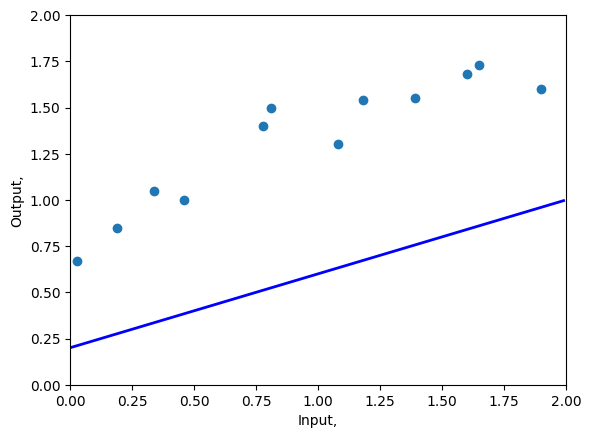

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x, phi0, phi1):
  y = phi1 + phi0*x
  return y
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input,')
    ax.set_ylabel('Output,')
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)
    plt.show()
phi0 = 0.4 ; phi1 = 0.2
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])
plot(x,y,phi0,phi1)

## **LOSS COMPUTATION FOR LINEAR REGRESSION**

In [ ]:
def compute_loss(x,y,phi0,phi1):
  loss = 0.0
  for i in range(len(x)):
    loss = loss + (y[i]-f(x[i],phi0,phi1))**2
  return loss
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss}, Ground truth =7.07')

Your Loss = 6.871796, Ground truth =7.07


## **SHALLOW NETWORK**

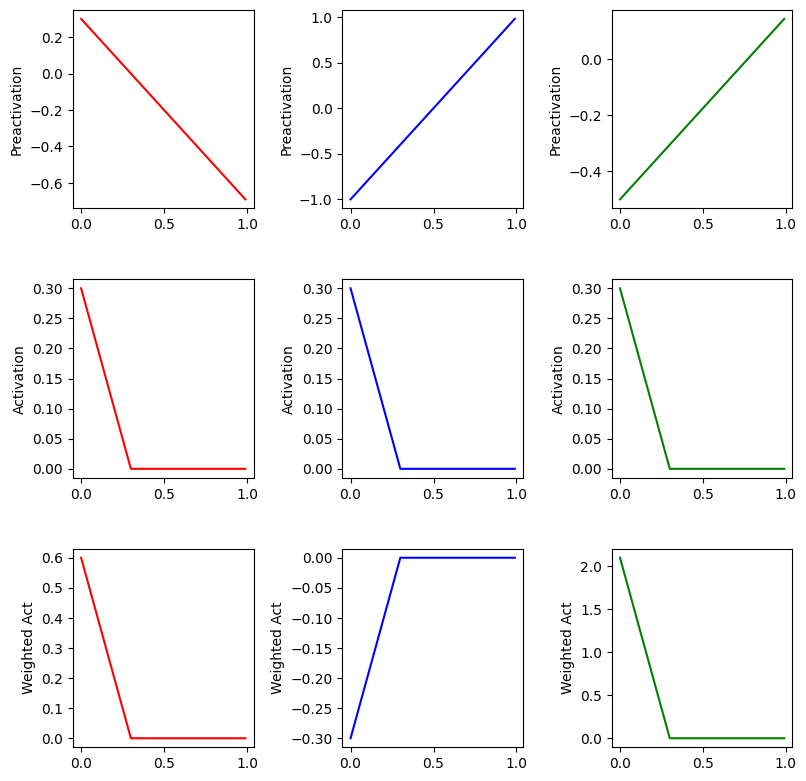

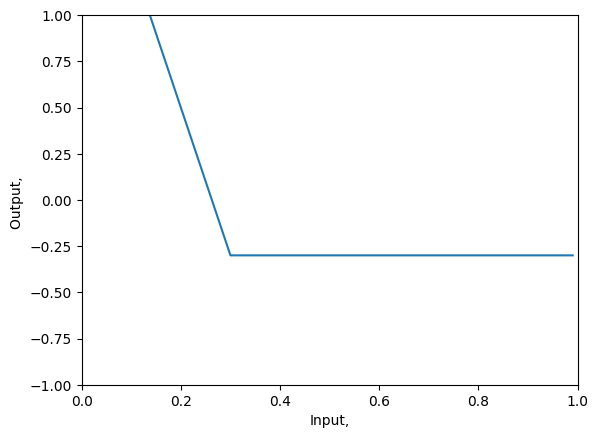

In [30]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x,phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  pre_1 = theta_10+np.dot(theta_11,x)
  pre_2 = theta_20+np.dot(theta_21,x)
  pre_3 = theta_30+np.dot(theta_31,x)
  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  act_1 = np.maximum(0,pre_1)
  act_2 = np.maximum(0,pre_1)
  act_3 = np.maximum(0,pre_1)
  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure 3.3 g-i
  w_act_1 = phi_1*act_1
  w_act_2 = phi_2*act_2
  w_act_3 = phi_3*act_3

  # TODO Replace the code below to combining the weighted activations and add
  # phi_0 to create the output as in figure 3.3 j
  y = phi_0+w_act_1+w_act_2+w_act_3

  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3
  # If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input,');
  ax.set_ylabel('Output, ')
  ax.set_xlim([0,1]);
  ax.set_ylim([-1,1])

  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()


# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = shallow_1_1_3(
    x,phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31
)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

## **IMPLEMENTATION OF SIMPLE NEURAL NETWORK**

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Sequential([
    Dense(10, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Print the first 10 predictions
print("Predicted classes:", predicted_classes[:10])
print("True classes:", true_classes[:10])


Epoch 1/100
20/20 [==============================] - 1s 15ms/step - loss: 0.9194 - accuracy: 0.4688 - val_loss: 0.5880 - val_accuracy: 0.7500
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4901 - accuracy: 0.8750 - val_loss: 0.3378 - val_accuracy: 0.9583
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.2564 - accuracy: 0.8958 - val_loss: 0.4523 - val_accuracy: 0.7917
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9583 - val_loss: 0.2216 - val_accuracy: 0.9583
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.9375 - val_loss: 0.3070 - val_accuracy: 0.9167
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.9688 - val_loss: 0.2323 - val_accuracy: 0.9583
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 0.0967 - accuracy: 0.9688 - val_loss: 0.1705 - val_accuracy: 0.9583
Epoch 8/100
